In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime as dt
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestClassifier

In [85]:
train=pd.read_csv('train.csv',parse_dates=['Date'])
features=pd.read_csv('features.csv',parse_dates=['Date'])
stores=pd.read_csv('stores.csv')

In [86]:
#merged = features.merge(stores, on ='Stores')
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [87]:
df1=pd.merge(features,stores,on=['Store'])
df1.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [88]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
 12  Type          8190 non-null   object        
 13  Size          8190 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 903.8+ KB


In [89]:
df1.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1,inplace=True)

In [90]:
df1.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False,A,151315


In [91]:
df1.to_csv('all_features.csv',index=False)

In [92]:
data=pd.merge(train,df1,on=['Date','Store','IsHoliday'])
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,A,151315


In [93]:
data.shape

(421570, 11)

In [94]:
y=[]
m=[]
d=[]
for dt in data['Date']:
    y.append(dt.year)
    m.append(dt.month)
    d.append(dt.day)

In [95]:
data['Year'] = pd.Series(y)
data['Month'] = pd.Series(m)
data['Day'] = pd.Series(d)

In [96]:
data.drop('Date',axis=1,inplace=True)

In [97]:
data.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Day
0,1,1,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
1,1,2,50605.27,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
2,1,3,13740.12,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
3,1,4,39954.04,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
4,1,5,32229.38,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5


In [98]:
numeric_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object', 'O','bool']]

In [99]:
numeric_var_names

['Store',
 'Dept',
 'Weekly_Sales',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment',
 'Size',
 'Year',
 'Month',
 'Day']

In [100]:
cat_var_names

['IsHoliday', 'Type']

In [101]:
data_num=data[numeric_var_names]
data_num.head(5)

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Day
0,1,1,24924.50,42.31,2.572,211.096358,8.106,151315,2010,2,5
1,1,2,50605.27,42.31,2.572,211.096358,8.106,151315,2010,2,5
2,1,3,13740.12,42.31,2.572,211.096358,8.106,151315,2010,2,5
3,1,4,39954.04,42.31,2.572,211.096358,8.106,151315,2010,2,5
4,1,5,32229.38,42.31,2.572,211.096358,8.106,151315,2010,2,5


In [102]:
# Replace negative and 0 as missing
pd.set_option('mode.chained_assignment', None) # For SettingWithCopyWarning
data_num[data_num<=0]=np.NaN

In [103]:
data_cat=data[cat_var_names]
data_cat.head(5)

,IsHoliday,Type
0,False,A
1,False,A
2,False,A
3,False,A
4,False,A


In [104]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.std()/x.mean(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

data_num.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,421570.0,0.0,9.359084e+06,22.200546,22.00000,12.785297,1.634638e+02,0.575900,1.000,1.000000,3.000000,5.000000,11.000000,22.00000,33.000000,40.000000,43.000000,45.000000,45.000000
Dept,421570.0,0.0,1.865882e+07,44.260317,37.00000,30.492054,9.297654e+02,0.688925,1.000,1.000000,4.000000,7.000000,18.000000,37.00000,74.000000,92.000000,95.000000,98.000000,99.000000
Weekly_Sales,420212.0,1358.0,6.737307e+09,16033.114591,7661.70000,22729.492116,5.166298e+08,1.417659,0.010,7.440000,67.551000,311.186000,2120.130000,7661.70000,20271.265000,42922.748000,61275.522000,106566.351400,693099.360000
Temperature,421501.0,69.0,2.533231e+07,60.100233,62.09000,18.432294,3.397495e+02,0.306693,5.540,18.360000,27.310000,33.990000,46.700000,62.09000,74.280000,83.580000,87.270000,92.810000,100.140000
Fuel_Price,421570.0,0.0,1.416908e+06,3.361027,3.45200,0.458515,2.102356e-01,0.136421,2.472,2.565000,2.653000,2.720000,2.933000,3.45200,3.738000,3.917000,4.029000,4.202000,4.468000
CPI,421570.0,0.0,7.217360e+07,171.201947,182.31878,39.159276,1.533449e+03,0.228731,126.064,126.111903,126.496258,128.823806,132.022667,182.31878,212.416993,219.444244,221.941558,225.473509,227.232807
Unemployment,421570.0,0.0,3.355819e+06,7.960289,7.86600,1.863296,3.471872e+00,0.234074,3.879,4.156000,5.326000,5.965000,6.891000,7.86600,8.572000,9.816000,12.187000,14.180000,14.313000
Size,421570.0,0.0,5.764039e+10,136727.915739,140167.00000,60980.583328,3.718632e+09,0.446000,34875.000,34875.000000,39690.000000,39910.000000,93638.000000,140167.00000,202505.000000,204184.000000,206302.000000,219622.000000,219622.000000
Year,421570.0,0.0,8.477640e+08,2010.968591,2011.00000,0.796876,6.350114e-01,0.000396,2010.000,2010.000000,2010.000000,2010.000000,2010.000000,2011.00000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000
Month,421570.0,0.0,2.718920e+06,6.449510,6.00000,3.243217,1.051846e+01,0.502863,1.000,1.000000,1.000000,2.000000,4.000000,6.00000,9.000000,11.000000,12.000000,12.000000,12.000000


In [105]:
num_summary=data_num.apply(var_summary).T
num_summary.to_csv('num_summary.csv')

In [106]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=data_cat.apply(cat_summary)

In [107]:
cat_summary

,IsHoliday,Type
N,421570,421570
NMISS,0,0
ColumnsNames,False 391909 True 29661 Name: IsHolida...,A 215478 B 163495 C 42597 Name: Type...


In [108]:
#Handling Outliers
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

data_num=data_num.apply(outlier_capping)

In [109]:
#Handling missings
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

data_num=data_num.apply(Missing_imputation)

In [110]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [111]:
for c_feature in ['IsHoliday', 'Type']:
        data_cat.loc[:,c_feature] = data_cat[c_feature].astype('category')
        data_cat = create_dummies(data_cat , c_feature )

In [112]:
data_cat.head()

,IsHoliday_True,Type_B,Type_C
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [113]:
data = pd.concat([data_num, data_cat], axis=1)
data.head()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Day,IsHoliday_True,Type_B,Type_C
0,1,1,24924.50,42.31,2.572,211.096358,8.106,151315,2010,2,5,0,0,0
1,1,2,50605.27,42.31,2.572,211.096358,8.106,151315,2010,2,5,0,0,0
2,1,3,13740.12,42.31,2.572,211.096358,8.106,151315,2010,2,5,0,0,0
3,1,4,39954.04,42.31,2.572,211.096358,8.106,151315,2010,2,5,0,0,0
4,1,5,32229.38,42.31,2.572,211.096358,8.106,151315,2010,2,5,0,0,0


In [114]:
corrm=data.corr()
corrm.to_csv('corrm.csv')
corrm

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Day,IsHoliday_True,Type_B,Type_C
Store,1.000000,0.024011,-0.083732,-0.052251,0.064984,-0.210949,0.208671,-0.182881,0.002997,0.001011,-0.000015,-0.000548,-0.233461,0.439004
Dept,0.024011,1.000000,0.143319,0.004383,0.003514,-0.007483,0.007874,-0.003022,0.003688,0.000894,-0.000664,0.000906,-0.029920,0.028344
Weekly_Sales,-0.083732,0.143319,1.000000,0.000576,0.001502,-0.022807,-0.025323,0.252590,-0.009287,0.025578,-0.007982,0.007948,-0.134705,-0.099054
Temperature,-0.052251,0.004383,0.000576,1.000000,0.142011,0.184608,0.095511,-0.059287,0.066476,0.234499,0.025848,-0.156730,-0.107740,0.135709
Fuel_Price,0.064984,0.003514,0.001502,0.142011,1.000000,-0.162609,-0.034938,0.004468,0.780315,-0.042186,0.028013,-0.077839,0.037372,0.001369
CPI,-0.210949,-0.007483,-0.022807,0.184608,-0.162609,1.000000,-0.300190,-0.003307,0.074335,0.005130,0.002701,-0.001934,-0.081883,-0.006557
Unemployment,0.208671,0.007874,-0.025323,0.095511,-0.034938,-0.300190,1.000000,-0.068099,-0.236754,-0.012963,-0.003802,0.010305,-0.013574,0.175291
Size,-0.182881,-0.003022,0.252590,-0.059287,0.004468,-0.003307,-0.068099,1.000000,-0.004975,-0.001210,-0.000386,0.000593,-0.455646,-0.528852
Year,0.002997,0.003688,-0.009287,0.066476,0.780315,0.074335,-0.236754,-0.004975,1.000000,-0.194288,0.005835,-0.056746,-0.000732,0.005244
Month,0.001011,0.000894,0.025578,0.234499,-0.042186,0.005130,-0.012963,-0.001210,-0.194288,1.000000,0.016363,0.123376,0.000019,-0.000092


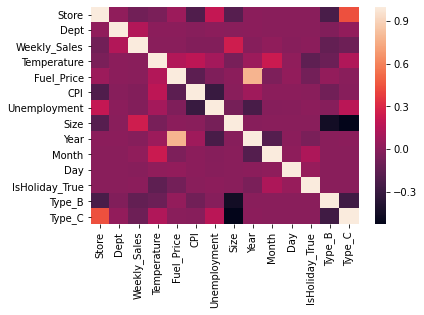

In [115]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(data.corr())

In [116]:
data.columns


Index(['Store', 'Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Size', 'Year', 'Month', 'Day', 'IsHoliday_True',
       'Type_B', 'Type_C'],
      dtype='object')

In [117]:
lm=smf.ols('Weekly_Sales~Store+Dept+Temperature+Fuel_Price+CPI+Unemployment+Size+Year+Month+Day+IsHoliday_True++Type_C', data).fit()

In [118]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     3565.
Date:                Sat, 08 Aug 2020   Prob (F-statistic):               0.00
Time:                        22:51:33   Log-Likelihood:            -4.7688e+06
No. Observations:              421570   AIC:                         9.538e+06
Df Residuals:                  421557   BIC:                         9.538e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6.153e+05   1.41e+05      4.

In [119]:
data.drop('Type_B',axis=1,inplace=True)

In [120]:
X=data[data.columns.difference(['Weekly_Sales'])]
y=data['Weekly_Sales']

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [123]:
#Decission Tree

from sklearn.tree import DecisionTreeRegressor  
from sklearn.model_selection import cross_val_predict

In [124]:
regressor = DecisionTreeRegressor(max_depth=5,random_state=0)  
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [125]:
pred=regressor.predict(X_train)
y_pred=regressor.predict(X_test)

In [126]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 9113.460578665334
Mean Squared Error: 191174213.57522035
Root Mean Squared Error: 13826.57635046436


In [127]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 9186.83618067357
Mean Squared Error: 194877398.09940347
Root Mean Squared Error: 13959.84950131639


In [128]:
from sklearn.metrics import r2_score

print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.5546226722716019
R-squared for Test: 0.5536357417116555


In [129]:
# list of values to try
max_depth_range = range(5, 15)

# list to store the average RMSE for each value of max_depth
RMSE_Scores = []
MSE_Scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=345)
    
    MSE_scores = cross_val_score(treereg, X_train, y_train, scoring='neg_mean_squared_error')
    
    RMSE_Scores.append(np.mean(np.sqrt(-MSE_scores)))
    MSE_Scores.append(MSE_scores)

C:\Users\shefe\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\shefe\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\shefe\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\shefe\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, Fut

In [130]:
print (RMSE_Scores)

[13838.176026902109, 11026.681903604898, 10041.11181676432, 9086.834420420857, 8220.37721273738, 7305.015712924942, 6478.9973793588615, 5848.283403386671, 5299.04240594944, 4851.382213691129]


Text(0, 0.5, 'RMSE (lower is better)')

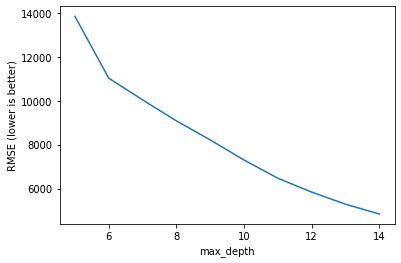

In [131]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_Scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [132]:
# max_depth=11 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=14, random_state=345)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=14, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=345, splitter='best')

In [133]:
treereg.feature_importances_

array([2.14902285e-02, 7.00694314e-03, 6.83762529e-01, 1.35995066e-03,
       1.43007854e-03, 1.61351466e-02, 1.90447029e-01, 5.43791520e-02,
       5.53736048e-03, 1.20822802e-02, 6.03788651e-03, 3.31415733e-04])

In [134]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
pd.DataFrame({'feature':data.columns.difference(['Weekly_Sales']), 'importance':treereg.feature_importances_})

,feature,importance
0,CPI,0.021490
1,Day,0.007007
2,Dept,0.683763
3,Fuel_Price,0.001360
4,IsHoliday_True,0.001430
5,Month,0.016135
6,Size,0.190447
7,Store,0.054379
8,Temperature,0.005537
9,Type_C,0.012082


In [135]:
# create a Graphviz file
from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='tree_vehicles.png', feature_names=data.columns.difference(['Weekly_Sales']))

In [136]:
pred=treereg.predict(X_train)
y_pred=treereg.predict(X_test)

In [137]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 2069.9751911511285
Mean Squared Error: 16407973.300713757
Root Mean Squared Error: 4050.6756597774843


In [138]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 2371.930765936819
Mean Squared Error: 21575823.535832647
Root Mean Squared Error: 4644.978313817262


In [139]:
print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.9617744508244808
R-squared for Test: 0.9505808443490213


In [140]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ShuffleSplit

In [141]:
gbrt=GradientBoostingRegressor()
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [142]:
pred=gbrt.predict(X_train)
y_pred=gbrt.predict(X_test)

In [143]:
#One of the benefits of growing trees is that we can understand how important each of the features are
print(gbrt.feature_importances_)

[1.09856812e-02 5.36147321e-04 7.51437878e-01 1.04415965e-06
 2.07666801e-04 2.38718421e-03 1.99210102e-01 2.90507155e-02
 4.23591299e-04 4.90473107e-03 8.26020113e-04 2.92381134e-05]


In [144]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 6551.714582016237
Mean Squared Error: 100815080.85690081
Root Mean Squared Error: 10040.671334970626


In [145]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 6551.714582016237
Mean Squared Error: 100815080.85690081
Root Mean Squared Error: 10040.671334970626


In [146]:
from sklearn.metrics import r2_score

print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.7651317587918206
R-squared for Test: 0.7610627592378938


In [147]:
param_grid={'learning_rate' : [0.1,0.01],# 0.02,0.05,0.1],
            'max_depth' : [4,6]}# 5,6]

In [148]:
gbrt=GradientBoostingRegressor(learning_rate=0.01, max_depth=6)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [149]:
pred=gbrt.predict(X_train)
y_pred=gbrt.predict(X_test)

In [150]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 8757.334746550901
Mean Squared Error: 156533706.6138548
Root Mean Squared Error: 12511.343117901242


In [151]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 8840.985051279675
Mean Squared Error: 161696310.42731223
Root Mean Squared Error: 12715.986411887685


In [152]:
print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.6353244370812139
R-squared for Test: 0.6296366106292444


In [153]:
from keras import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [154]:
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=1, input_dim=12))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae'])
    return regressor

In [155]:
regressor = KerasRegressor(build_fn=build_regressor, batch_size=256,epochs=10)

In [156]:
results=regressor.fit(X_train,y_train)


Epoch 1/10
1153/1153 [==============================] - 1s 868us/step - loss: 406779904.0000 - mae: 13994.0049
Epoch 2/10
1153/1153 [==============================] - 1s 815us/step - loss: 404515456.0000 - mae: 13861.1846
Epoch 3/10
1153/1153 [==============================] - 1s 796us/step - loss: 404167840.0000 - mae: 13872.2734
Epoch 4/10
1153/1153 [==============================] - 1s 815us/step - loss: 403846912.0000 - mae: 13883.4297
Epoch 5/10
1153/1153 [==============================] - 1s 860us/step - loss: 403508544.0000 - mae: 13892.3252
Epoch 6/10
1153/1153 [==============================] - 1s 830us/step - loss: 403212416.0000 - mae: 13903.4092
Epoch 7/10
1153/1153 [==============================] - 1s 870us/step - loss: 402914208.0000 - mae: 13918.1670
Epoch 8/10
1153/1153 [==============================] - 1s 736us/step - loss: 402623776.0000 - mae: 13929.8486
Epoch 9/10
1153/1153 [==============================] - 1s 817us/step - loss: 402364864.0000 - mae: 13942.7402
E

In [157]:
pred= regressor.predict(X_train)
y_pred= regressor.predict(X_test)

In [158]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 13766.048384326725
Mean Squared Error: 402348064.0920225
Root Mean Squared Error: 20058.615707272085
